In [33]:
import utils
import pandas as pd
from datetime import datetime

In [52]:
import importlib
import utils

importlib.reload(utils)

<module 'utils' from 'c:\\Users\\agand\\OneDrive\\Escritorio\\lakes\\lake-algae-analysis\\notebooks\\utils.py'>

In [71]:
all_saved_logs = pd.read_csv(r"../data/all_saved_logs.csv")
all_lakes = pd.read_csv(f"{utils.get_data_directory()}/all_lakes.csv")

In [72]:
all_saved_logs

,osmid,day,exists_true_image,total_pixel_area,water_area,cloud_area,water_with_no_clouds_area,no_chl_area,chl_very_low_area,chl_low_area,chl_moderate_area,chl_high_area,chl_very_high_area
0,1624070,2024-01-25,True,658218125.0,443616875.0,199115000.0,342863125.0,144963125.0,45625.0,39214375.0,88605625.0,69139375.0,895000.0
1,1624070,2024-03-05,True,658218125.0,331030625.0,88051250.0,305414375.0,65399375.0,222500.0,93954375.0,126409375.0,19419375.0,9375.0
2,1624070,2024-04-14,True,658218125.0,382576250.0,27640000.0,362883750.0,104605000.0,428750.0,144733125.0,84498750.0,27709375.0,908750.0
3,1624070,2024-05-24,True,658218125.0,390539375.0,11503750.0,382618750.0,150752500.0,362500.0,159971875.0,47721250.0,22063125.0,1747500.0
4,1624070,2024-07-03,True,658218125.0,462668750.0,454092500.0,192956250.0,192954375.0,0.0,1875.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,999679411,2024-04-12,True,967075.0,85425.0,982400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8275,999679411,2024-03-03,True,967075.0,525400.0,838875.0,139850.0,139850.0,0.0,0.0,0.0,0.0,0.0
8276,999679411,2024-01-23,True,967075.0,70425.0,867275.0,3650.0,3650.0,0.0,0.0,0.0,0.0,0.0
8277,999679411,2024-01-02,False,967075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
all_saved_logs = all_saved_logs.drop(["total_pixel_area"], axis = 1)

In [74]:
df = pd.merge(all_saved_logs,all_lakes, on='osmid', how='inner')
df["day"] = pd.to_datetime(df["day"], format='%Y-%m-%d')

In [75]:
df

,osmid,day,exists_true_image,water_area,cloud_area,water_with_no_clouds_area,no_chl_area,chl_very_low_area,chl_low_area,chl_moderate_area,...,name,area,distance,water,university,centroid_long,centroid_lat,pixel_count,total_pixel_area,resolution
0,1624070,2024-01-25,True,443616875.0,199115000.0,342863125.0,144963125.0,45625.0,39214375.0,88605625.0,...,Pulicat Lake,5.605353e+08,69036.566401,lake,Anna University,80.160980,13.630831,1053149,658218125,25
1,1624070,2024-03-05,True,331030625.0,88051250.0,305414375.0,65399375.0,222500.0,93954375.0,126409375.0,...,Pulicat Lake,5.605353e+08,69036.566401,lake,Anna University,80.160980,13.630831,1053149,658218125,25
2,1624070,2024-04-14,True,382576250.0,27640000.0,362883750.0,104605000.0,428750.0,144733125.0,84498750.0,...,Pulicat Lake,5.605353e+08,69036.566401,lake,Anna University,80.160980,13.630831,1053149,658218125,25
3,1624070,2024-05-24,True,390539375.0,11503750.0,382618750.0,150752500.0,362500.0,159971875.0,47721250.0,...,Pulicat Lake,5.605353e+08,69036.566401,lake,Anna University,80.160980,13.630831,1053149,658218125,25
4,1624070,2024-07-03,True,462668750.0,454092500.0,192956250.0,192954375.0,0.0,1875.0,0.0,...,Pulicat Lake,5.605353e+08,69036.566401,lake,Anna University,80.160980,13.630831,1053149,658218125,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,999679411,2024-04-12,True,85425.0,982400.0,0.0,0.0,0.0,0.0,0.0,...,NaN,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5
8275,999679411,2024-03-03,True,525400.0,838875.0,139850.0,139850.0,0.0,0.0,0.0,...,NaN,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5
8276,999679411,2024-01-23,True,70425.0,867275.0,3650.0,3650.0,0.0,0.0,0.0,...,NaN,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5
8277,999679411,2024-01-02,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5


In [76]:
df_2024 = df[(df["day"] > datetime(2024, 1, 1)) & (df["exists_true_image"] == True)]

In [77]:
df_2024

,osmid,day,exists_true_image,water_area,cloud_area,water_with_no_clouds_area,no_chl_area,chl_very_low_area,chl_low_area,chl_moderate_area,...,name,area,distance,water,university,centroid_long,centroid_lat,pixel_count,total_pixel_area,resolution
0,1624070,2024-01-25,True,443616875.0,199115000.0,342863125.0,144963125.0,45625.0,39214375.0,88605625.0,...,Pulicat Lake,5.605353e+08,69036.566401,lake,Anna University,80.160980,13.630831,1053149,658218125,25
1,1624070,2024-03-05,True,331030625.0,88051250.0,305414375.0,65399375.0,222500.0,93954375.0,126409375.0,...,Pulicat Lake,5.605353e+08,69036.566401,lake,Anna University,80.160980,13.630831,1053149,658218125,25
2,1624070,2024-04-14,True,382576250.0,27640000.0,362883750.0,104605000.0,428750.0,144733125.0,84498750.0,...,Pulicat Lake,5.605353e+08,69036.566401,lake,Anna University,80.160980,13.630831,1053149,658218125,25
3,1624070,2024-05-24,True,390539375.0,11503750.0,382618750.0,150752500.0,362500.0,159971875.0,47721250.0,...,Pulicat Lake,5.605353e+08,69036.566401,lake,Anna University,80.160980,13.630831,1053149,658218125,25
4,1624070,2024-07-03,True,462668750.0,454092500.0,192956250.0,192954375.0,0.0,1875.0,0.0,...,Pulicat Lake,5.605353e+08,69036.566401,lake,Anna University,80.160980,13.630831,1053149,658218125,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,999679411,2024-07-01,True,0.0,982400.0,0.0,0.0,0.0,0.0,0.0,...,NaN,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5
8273,999679411,2024-05-22,True,0.0,982400.0,0.0,0.0,0.0,0.0,0.0,...,NaN,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5
8274,999679411,2024-04-12,True,85425.0,982400.0,0.0,0.0,0.0,0.0,0.0,...,NaN,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5
8275,999679411,2024-03-03,True,525400.0,838875.0,139850.0,139850.0,0.0,0.0,0.0,...,NaN,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5


In [63]:

import pandas as pd

# Agrupar por 'osmid' y aplicar las agregaciones solicitadas
df_agrupado = df_2024.groupby('osmid').agg(
    max_water_area=('water_area', 'max'),
    min_cloud_area=('cloud_area', 'min'),
    total_area = ("total_pixel_area", "max"),
    max_water_with_no_clouds_area=('water_with_no_clouds_area', 'max'),
    count_records=('osmid', 'size')  # Conteo de registros por cada osmid
).reset_index()

# Mostrar el DataFrame resultante
df_agrupado.loc[:,"water_ratio"] = df_agrupado["max_water_with_no_clouds_area"] / df_agrupado["total_area"]
df_agrupado.loc[:,"cloud_ratio"] = df_agrupado["min_cloud_area"] / df_agrupado["total_area"]



In [64]:
df_agrupado[df_agrupado["cloud_ratio"]==0]

,osmid,max_water_area,min_cloud_area,total_area,max_water_with_no_clouds_area,count_records,water_ratio,cloud_ratio
0,1000877890,275950.0,0.0,1244750,173500.0,24,0.139385,0.0
1,1000877892,865625.0,0.0,2499700,405575.0,23,0.162249,0.0
2,1001772927,756400.0,0.0,985450,659725.0,7,0.669466,0.0
3,1002016842,132400.0,0.0,969300,15925.0,24,0.016429,0.0
4,1016927646,345600.0,0.0,908550,137275.0,25,0.151092,0.0
...,...,...,...,...,...,...,...,...
355,97868797,2886125.0,0.0,3437475,2886125.0,7,0.839606,0.0
356,989004111,322625.0,0.0,1249800,291975.0,12,0.233617,0.0
357,995251562,902950.0,0.0,890700,91325.0,22,0.102532,0.0
358,9961445,4468650.0,0.0,4437750,4318600.0,25,0.973151,0.0


In [65]:
df_agrupado

,osmid,max_water_area,min_cloud_area,total_area,max_water_with_no_clouds_area,count_records,water_ratio,cloud_ratio
0,1000877890,275950.0,0.0,1244750,173500.0,24,0.139385,0.0
1,1000877892,865625.0,0.0,2499700,405575.0,23,0.162249,0.0
2,1001772927,756400.0,0.0,985450,659725.0,7,0.669466,0.0
3,1002016842,132400.0,0.0,969300,15925.0,24,0.016429,0.0
4,1016927646,345600.0,0.0,908550,137275.0,25,0.151092,0.0
...,...,...,...,...,...,...,...,...
355,97868797,2886125.0,0.0,3437475,2886125.0,7,0.839606,0.0
356,989004111,322625.0,0.0,1249800,291975.0,12,0.233617,0.0
357,995251562,902950.0,0.0,890700,91325.0,22,0.102532,0.0
358,9961445,4468650.0,0.0,4437750,4318600.0,25,0.973151,0.0


In [67]:
bad_lakes = df_agrupado[(df_agrupado["cloud_ratio"] > 0.0)]
bad_lakes

,osmid,max_water_area,min_cloud_area,total_area,max_water_with_no_clouds_area,count_records,water_ratio,cloud_ratio
100,1624070,491740000.0,773125.0,658218125,398895625.0,12,0.606023,0.001175
134,25394157,18463900.0,272275.0,19323400,17760200.0,7,0.919103,0.014090
319,82611270,20617000.0,376000.0,23826300,19480400.0,6,0.817601,0.015781
346,9218434,14233700.0,90900.0,23562600,14215800.0,7,0.603321,0.003858


In [68]:
lakes_filtrados = all_lakes[all_lakes['osmid'].isin(bad_lakes['osmid'])]
lakes_filtrados

,osmid,name,area,distance,water,university,centroid_long,centroid_lat,pixel_count,total_pixel_area,resolution
13,1624070,Pulicat Lake,5.605353e+08,69036.566401,lake,Anna University,80.160980,13.630831,1053149,658218125,25
82,9218434,NaN,2.260782e+07,59571.377872,reservoir,Assam University,92.754511,24.268397,235626,23562600,10
106,25394157,Red Hills Reservoir,1.931331e+07,18224.387293,reservoir,Anna University,80.170802,13.162759,772936,19323400,5
155,82611270,Veeranam Lake,2.349551e+07,25547.307840,lake,Annamalai University,79.532856,11.331522,238263,23826300,10


In [69]:
bad_lakes_logs = utils.get_historical_all_lakes_logs(lakes_filtrados, datetime(2024, 1, 21), datetime.now(), 8)

13
2024-03-05 00:00:00
2024-04-14 00:00:00
2024-05-24 00:00:00
2024-07-03 00:00:00
2024-08-12 00:00:00
82
2024-03-03 00:00:00
2024-04-12 00:00:00
2024-05-22 00:00:00
2024-07-01 00:00:00
2024-08-10 00:00:00
106
2024-03-05 00:00:00
2024-04-14 00:00:00
2024-05-24 00:00:00
2024-07-03 00:00:00
2024-08-12 00:00:00
155
2024-03-05 00:00:00
2024-04-14 00:00:00
2024-05-24 00:00:00
2024-07-03 00:00:00
2024-08-12 00:00:00


In [70]:
bad_lakes_logs

,osmid,day,exists_true_image,total_pixel_area,water_area,cloud_area,water_with_no_clouds_area,no_chl_area,chl_very_low_area,chl_low_area,chl_moderate_area,chl_high_area,chl_very_high_area
0,1624070,2024-01-25,True,658218125,443616875,199115000,342863125,144963125,45625,39214375,88605625,69139375,895000
1,1624070,2024-03-05,True,658218125,331030625,88051250,305414375,65399375,222500,93954375,126409375,19419375,9375
2,1624070,2024-04-14,True,658218125,382576250,27640000,362883750,104605000,428750,144733125,84498750,27709375,908750
3,1624070,2024-05-24,True,658218125,390539375,11503750,382618750,150752500,362500,159971875,47721250,22063125,1747500
4,1624070,2024-07-03,True,658218125,462668750,454092500,192956250,192954375,0,1875,0,0,0
5,1624070,2024-08-12,True,658218125,372906875,662785625,0,0,0,0,0,0,0
6,9218434,2024-01-23,True,23562600,5162000,15525100,3577300,3573000,3200,900,200,0,0
7,9218434,2024-03-03,True,23562600,9693900,0,9693900,9650600,8300,34800,200,0,0
8,9218434,2024-04-12,True,23562600,4722100,23977400,367200,367200,0,0,0,0,0
9,9218434,2024-05-22,True,23562600,6712400,5583300,6707000,5828800,65700,812500,0,0,0


In [19]:
len(bad_lakes)

52

In [10]:
logs_with_chl = utils.calculate_chl(df_2024)

[25.48, 47.06, 68.64, 90.22000000000001, 111.80000000000001]


c:\Users\agand\OneDrive\Escritorio\lakes\lake-algae-analysis\notebooks\utils.py:1057: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs.loc[:,f"chl_{function_type}"] = total_chl


In [11]:
logs_with_chl

,osmid,day,exists_true_image,water_area,cloud_area,water_with_no_clouds_area,no_chl_area,chl_very_low_area,chl_low_area,chl_moderate_area,...,area,distance,water,university,centroid_long,centroid_lat,pixel_count,total_pixel_area,resolution,chl_lineal
0,1000877890,2024-06-03,True,220575.0,1214900.0,15625.0,15625.0,0.0,0.0,0.0,...,1.233457e+06,61739.274820,reservoir,Annamalai University,79.313266,11.059466,49790,1244750,5,0.0
7,1000877890,2024-01-10,True,12175.0,1257800.0,0.0,0.0,0.0,0.0,0.0,...,1.233457e+06,61739.274820,reservoir,Annamalai University,79.313266,11.059466,49790,1244750,5,0.0
8,1000877890,2024-08-22,True,42900.0,0.0,42900.0,38300.0,0.0,0.0,0.0,...,1.233457e+06,61739.274820,reservoir,Annamalai University,79.313266,11.059466,49790,1244750,5,503490.0
9,1000877890,2024-08-02,True,0.0,1258125.0,0.0,0.0,0.0,0.0,0.0,...,1.233457e+06,61739.274820,reservoir,Annamalai University,79.313266,11.059466,49790,1244750,5,0.0
10,1000877890,2024-02-19,True,66100.0,1250500.0,7625.0,7625.0,0.0,0.0,0.0,...,1.233457e+06,61739.274820,reservoir,Annamalai University,79.313266,11.059466,49790,1244750,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8128,999679411,2024-07-01,True,0.0,982400.0,0.0,0.0,0.0,0.0,0.0,...,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5,0.0
8129,999679411,2024-05-22,True,0.0,982400.0,0.0,0.0,0.0,0.0,0.0,...,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5,0.0
8130,999679411,2024-04-12,True,85425.0,982400.0,0.0,0.0,0.0,0.0,0.0,...,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5,0.0
8131,999679411,2024-03-03,True,525400.0,838875.0,139850.0,139850.0,0.0,0.0,0.0,...,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5,0.0


In [12]:
logs_with_chl_filtered = logs_with_chl[
    (logs_with_chl["chl_very_low_area"] > 0) |
    (logs_with_chl["chl_low_area"] > 0) |
    (logs_with_chl["chl_moderate_area"] > 0) |
    (logs_with_chl["chl_high_area"] > 0) |
    (logs_with_chl["chl_very_high_area"] > 0)
]
logs_with_chl_filtered

,osmid,day,exists_true_image,water_area,cloud_area,water_with_no_clouds_area,no_chl_area,chl_very_low_area,chl_low_area,chl_moderate_area,...,area,distance,water,university,centroid_long,centroid_lat,pixel_count,total_pixel_area,resolution,chl_lineal
8,1000877890,2024-08-22,True,42900.0,0.0,42900.0,38300.0,0.0,0.0,0.0,...,1.233457e+06,61739.274820,reservoir,Annamalai University,79.313266,11.059466,49790,1244750,5,503490.0
11,1000877890,2024-03-30,True,52925.0,0.0,52925.0,49725.0,0.0,575.0,375.0,...,1.233457e+06,61739.274820,reservoir,Annamalai University,79.313266,11.059466,49790,1244750,5,257952.5
14,1000877890,2024-06-18,True,50775.0,0.0,50775.0,50200.0,100.0,0.0,0.0,...,1.233457e+06,61739.274820,reservoir,Annamalai University,79.313266,11.059466,49790,1244750,5,53495.0
22,1000877890,2024-03-05,True,60900.0,0.0,60900.0,60100.0,0.0,0.0,0.0,...,1.233457e+06,61739.274820,reservoir,Annamalai University,79.313266,11.059466,49790,1244750,5,76492.0
26,1000877890,2024-08-12,True,54350.0,0.0,54350.0,48925.0,0.0,0.0,0.0,...,1.233457e+06,61739.274820,reservoir,Annamalai University,79.313266,11.059466,49790,1244750,5,587632.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8108,999679411,2024-07-31,True,113500.0,0.0,113500.0,110850.0,0.0,0.0,0.0,...,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5,258505.0
8109,999679411,2024-07-11,True,169175.0,0.0,169175.0,155975.0,0.0,100.0,100.0,...,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5,1238380.0
8114,999679411,2024-04-02,True,185825.0,0.0,185825.0,173700.0,1600.0,3750.0,5975.0,...,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5,701701.0
8115,999679411,2024-03-13,True,180425.0,0.0,180425.0,175375.0,1475.0,1725.0,1850.0,...,9.680258e+05,65895.155507,basin,Alagappa University,78.584431,9.520923,38683,967075,5,245745.5


In [13]:
logs_with_chl_filtered = logs_with_chl_filtered.sort_values(by = "chl_lineal", ascending=False)

In [14]:
logs_with_chl_filtered

,osmid,day,exists_true_image,water_area,cloud_area,water_with_no_clouds_area,no_chl_area,chl_very_low_area,chl_low_area,chl_moderate_area,...,area,distance,water,university,centroid_long,centroid_lat,pixel_count,total_pixel_area,resolution,chl_lineal
3696,2810519,2024-08-28,True,705009375.0,87864375.0,622226250.0,176038125.0,901250.0,190400625.0,147178125.0,...,7.018787e+08,131506.801830,reservoir,Aisect University,76.669241,22.195976,1144148,715092500,25,2.901856e+10
2265,1624070,2024-04-24,True,348561250.0,773125.0,348560625.0,70001875.0,156250.0,66714375.0,119415000.0,...,5.605353e+08,69036.566401,lake,Anna University,80.160980,13.630831,1053149,658218125,25,1.966915e+10
3690,2810519,2024-04-20,True,574840000.0,0.0,574840000.0,48481875.0,250611250.0,273546250.0,2178750.0,...,7.018787e+08,131506.801830,reservoir,Aisect University,76.669241,22.195976,1144148,715092500,25,1.941018e+10
3686,2810519,2024-03-11,True,600839375.0,0.0,600839375.0,38753125.0,330601250.0,229735625.0,1734375.0,...,7.018787e+08,131506.801830,reservoir,Aisect University,76.669241,22.195976,1144148,715092500,25,1.935548e+10
3697,2810519,2024-03-21,True,594846250.0,0.0,594846250.0,44071250.0,367431250.0,182748750.0,589375.0,...,7.018787e+08,131506.801830,reservoir,Aisect University,76.669241,22.195976,1144148,715092500,25,1.800327e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3508,265359641,2024-03-03,True,135000.0,0.0,135000.0,134900.0,100.0,0.0,0.0,...,1.047787e+06,80511.171783,lake,Annamalai University,79.222859,11.917488,42155,1053875,5,2.548000e+03
5513,5485416,2024-02-10,True,5116125.0,0.0,5116125.0,5116025.0,100.0,0.0,0.0,...,7.356858e+06,66238.657574,reservoir,Amrita Vishwa Vidyapeetham,76.393494,10.532061,301131,7528275,5,2.548000e+03
2847,196507985,2024-02-11,True,13377025.0,0.0,13377025.0,13376925.0,100.0,0.0,0.0,...,1.360744e+07,69657.011794,reservoir,Amity University,73.265561,19.569429,541706,13542650,5,2.548000e+03
7681,9042893,2024-03-22,True,183875.0,0.0,183875.0,183775.0,100.0,0.0,0.0,...,1.481631e+06,29601.559345,reservoir,Anand Agricultural University,73.259678,22.581660,59669,1491725,5,2.548000e+03


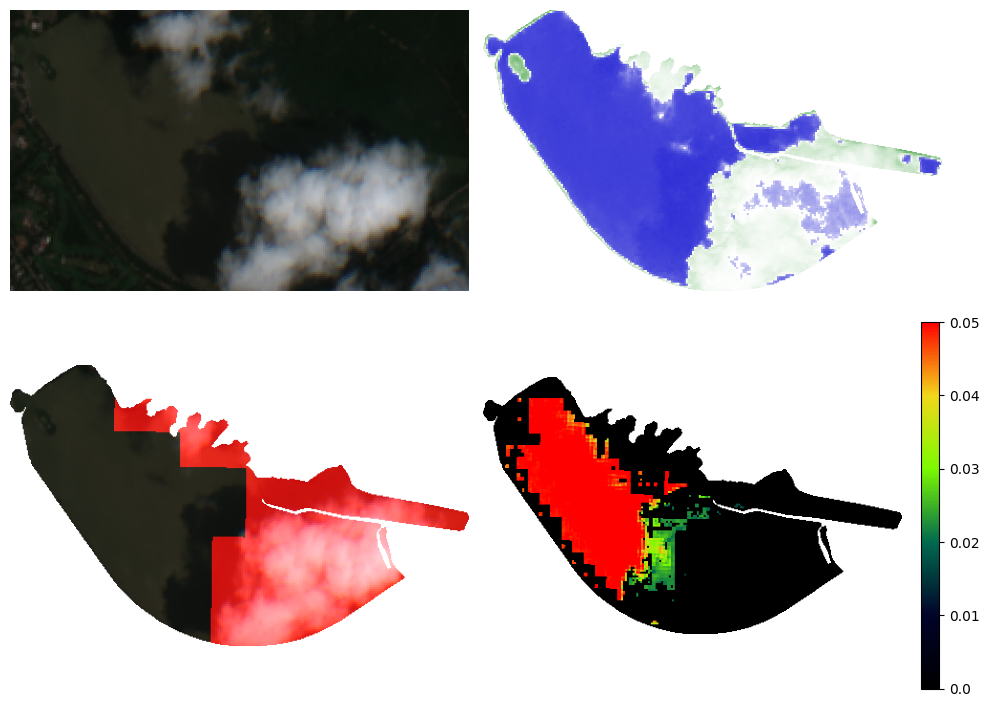

In [60]:
utils.plot_all_type_images(8421510, datetime(2020, 6, 23), 5)

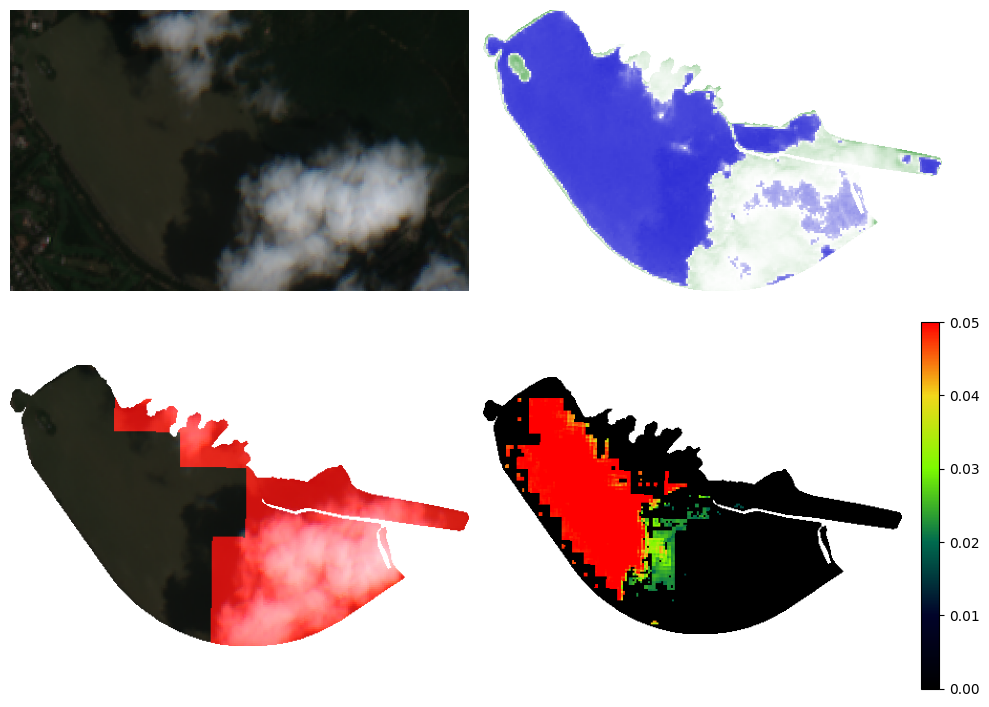

In [73]:
utils.plot_all_type_images(8421510, datetime(2020, 6, 23), 5)

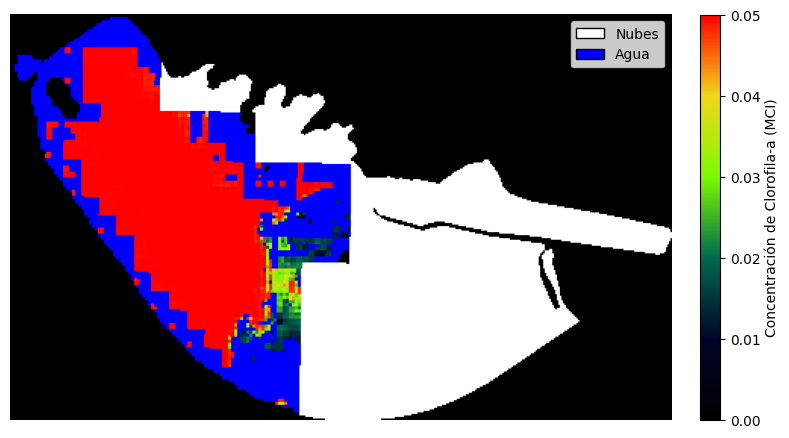

In [15]:
transformed_image = utils.get_transformed_image(8421510, datetime(2020, 6, 23), plot=True)

17004


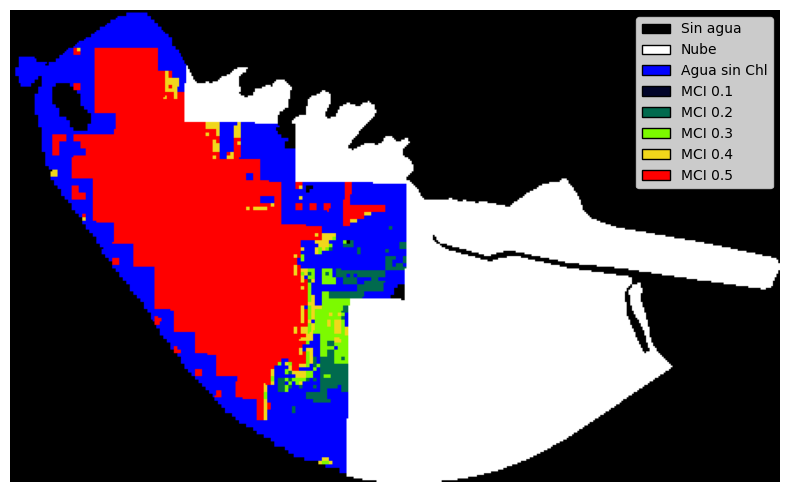

In [33]:
transformed_image = utils.get_transformed_image(8421510, datetime(2020, 6, 23), plot=True)

In [29]:
from collections import Counter
pixels = transformed_image.reshape(-1, 3)
pixel_colors = [tuple(pixel) for pixel in pixels]

# Contar la frecuencia de cada color en la imagen
pixel_count = Counter(pixel_colors)
pixel_count

Counter({(0, 0, 0): 62049,
         (255, 255, 255): 27338,
         (255, 0, 0): 14619,
         (0, 0, 255): 10725,
         (0, 106, 78): 897,
         (124, 250, 0): 769,
         (241, 215, 27): 719})